<a href="https://colab.research.google.com/github/NitinSingh8/Machine-Learning-Project/blob/main/Fake_News_or_Spam_Mail_Detection/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project** ===> Spam Mail Detection / Fake_News Detection

## Supervised Machine Learning(Regression)

# Let's Import and Clean the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Projects_ML/Fake_News/news.csv')
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


**let remove unamed column**

In [ ]:
df = df.iloc[:,1:]
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


**checking for null value**

In [ ]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [ ]:
df.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

**Lets change the target value**

**Fake** ===>  0

**REAL** ===>  1

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [ ]:
df['target'] = lb.fit_transform(df.label)
df.drop(columns  = ['label'] , axis=1,inplace = True)
df

,title,text,target
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


0   -> FAKE

1   -> REAL

In [ ]:
X = df.text
Y = df.target

In [ ]:
print(X.shape)
print(Y.shape)

(6335,)
(6335,)


# split into training and testing

import train_test_split and divide the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , Y_train, Y_test  = train_test_split(X,Y , test_size= 0.2)
# print(X_train.shape)
# print(X_test.shape)  

# Let's fit into model 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
model = Pipeline([
                  ('vectorizer', CountVectorizer()),
                  ('nb',MultinomialNB())
])

In [ ]:
model.fit(X_train, Y_train) # fitting into the model

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
model.score(X_test , Y_test) # checking the score

0.8958168902920284

In [ ]:
Y_pred = model.predict(X_train) # Lets predict the X_train and store in Y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,Y_pred))

0.9325177584846093


Let see the confusion matrix with help of heatmap

In [ ]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(Y_train,Y_pred)
cf

array([[2275,  244],
       [  98, 2451]])

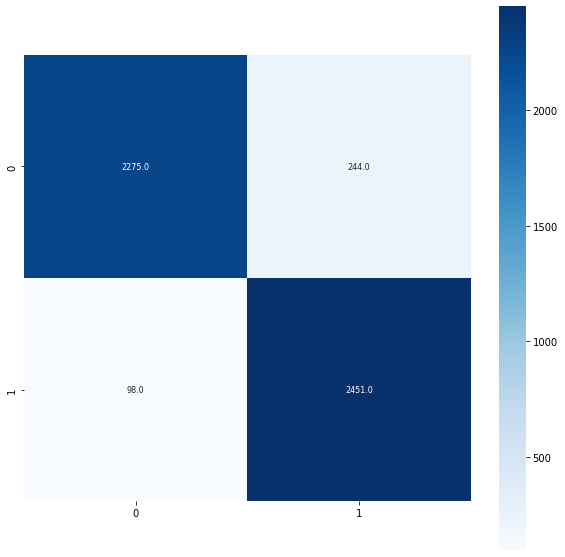

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cf, cbar =True, square=True, fmt='.1f', annot = True , annot_kws = {'size':8}, cmap = 'Blues')
